In [1]:
# -*- coding: utf-8 -*-

import torch
from kan import *
from kan.utils import create_dataset
from sympy import symbols
from kan.compiler import kanpiler
from kan.feynman import get_feynman_dataset
from kan.MLP import MLP
import matplotlib.pyplot as plt

In [2]:

# Set default precision and device
torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda



>>> KAN可解释性示例：
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.95e-02 | test_loss: 1.92e-02 | reg: 5.67e+00 | : 100%|█| 50/50 [00:27<00:00,  1.79it


saving model version 0.1


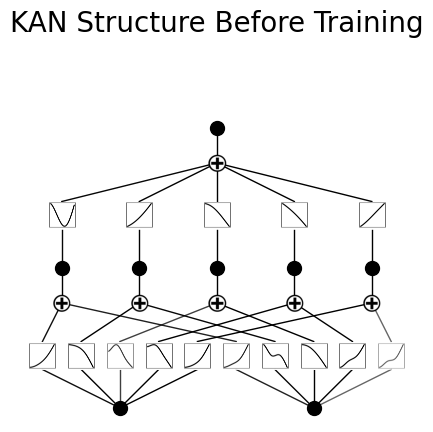

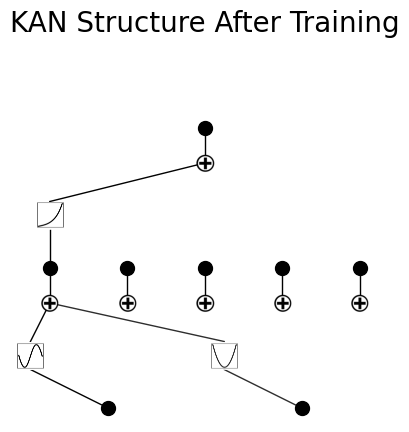

In [3]:

# 1. 可解释性示例
print("\n>>> KAN可解释性示例：")
f1 = lambda x: torch.exp(torch.sin(torch.pi * x[:,[0]]) + x[:,[1]]**2)
dataset1 = create_dataset(f1, n_var=2, device=device)
model1 = KAN(width=[2, 5, 1], grid=3, k=3, seed=42, device=device)
model1(dataset1['train_input'])  # 初始化状态
model1.plot(title="KAN Structure Before Training")
model1.fit(dataset1, opt="LBFGS", steps=50, lamb=0.001)
model1.plot(title="KAN Structure After Training")



In [4]:
# 2. 与MLP对比
print("\n>>> KAN vs. MLP：")
mlp1 = MLP(width=[2, 5, 1]).to(device)
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(mlp1.parameters(), lr=1e-3)

for epoch in range(2000):
    mlp1.train()
    opt.zero_grad()
    pred = mlp1(dataset1['train_input'])
    loss = loss_fn(pred, dataset1['train_label'])
    loss.backward()
    opt.step()

# 评估 RMSE
mlp1.eval()
with torch.no_grad():
    pred_kan = model1(dataset1['test_input'])
    pred_mlp = mlp1(dataset1['test_input'])
    rmse_kan = torch.sqrt(torch.mean((pred_kan - dataset1['test_label'])**2)).item()
    rmse_mlp = torch.sqrt(torch.mean((pred_mlp - dataset1['test_label'])**2)).item()
    print(f"RMSE (KAN): {rmse_kan:.4f}")
    print(f"RMSE (MLP): {rmse_mlp:.4f}")



>>> KAN vs. MLP：
RMSE (KAN): 0.0192
RMSE (MLP): 0.9031



>>> Feynman 方程拟合对比（自动遍历所有可用问题）

=== Problem 1 ===
表达式: sqrt(2)*exp(-theta**2/2)/(2*sqrt(pi))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.15e-02 | test_loss: 1.14e-02 | reg: 1.02e+01 | : 100%|█| 1/1 [00:00<00:00,  1.60it/s


saving model version 0.1


| train_loss: 1.11e-02 | test_loss: 1.14e-02 | reg: 9.19e+00 | : 100%|█| 1/1 [00:00<00:00,  1.45it/s


saving model version 0.2


| train_loss: 7.66e-03 | test_loss: 7.80e-03 | reg: 8.21e+00 | : 100%|█| 1/1 [00:00<00:00,  1.60it/s


saving model version 0.3


| train_loss: 5.92e-03 | test_loss: 6.12e-03 | reg: 7.75e+00 | : 100%|█| 1/1 [00:00<00:00,  1.61it/s


saving model version 0.4


| train_loss: 6.74e-03 | test_loss: 6.81e-03 | reg: 7.63e+00 | : 100%|█| 1/1 [00:00<00:00,  1.52it/s


saving model version 0.5


| train_loss: 6.30e-03 | test_loss: 6.52e-03 | reg: 7.59e+00 | : 100%|█| 1/1 [00:00<00:00,  1.17it/s


saving model version 0.6


| train_loss: 6.82e-03 | test_loss: 6.89e-03 | reg: 7.48e+00 | : 100%|█| 1/1 [00:00<00:00,  1.70it/s


saving model version 0.7


| train_loss: 7.73e-03 | test_loss: 7.98e-03 | reg: 7.37e+00 | : 100%|█| 1/1 [00:00<00:00,  1.52it/s


saving model version 0.8


| train_loss: 7.49e-03 | test_loss: 7.41e-03 | reg: 7.15e+00 | : 100%|█| 1/1 [00:00<00:00,  1.53it/s


saving model version 0.9


| train_loss: 5.91e-03 | test_loss: 6.11e-03 | reg: 7.09e+00 | : 100%|█| 1/1 [00:00<00:00,  1.47it/s


saving model version 0.10


| train_loss: 5.98e-03 | test_loss: 6.11e-03 | reg: 7.06e+00 | : 100%|█| 1/1 [00:00<00:00,  1.04it/s


saving model version 0.11


| train_loss: 5.96e-03 | test_loss: 6.09e-03 | reg: 7.00e+00 | : 100%|█| 1/1 [00:00<00:00,  1.10it/s


saving model version 0.12


| train_loss: 5.82e-03 | test_loss: 5.95e-03 | reg: 6.95e+00 | : 100%|█| 1/1 [00:00<00:00,  1.61it/s


saving model version 0.13


| train_loss: 5.95e-03 | test_loss: 6.10e-03 | reg: 6.91e+00 | : 100%|█| 1/1 [00:00<00:00,  1.33it/s


saving model version 0.14


| train_loss: 5.83e-03 | test_loss: 5.97e-03 | reg: 6.83e+00 | : 100%|█| 1/1 [00:00<00:00,  1.57it/s


saving model version 0.15
KAN RMSE: 0.0000 | MLP RMSE: 0.0007

=== Problem 2 ===
表达式: sqrt(2)*exp(-theta**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.19e-02 | test_loss: 2.32e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  1.48it/s


saving model version 0.1


| train_loss: 2.03e-02 | test_loss: 2.25e-02 | reg: 1.01e+01 | : 100%|█| 1/1 [00:00<00:00,  1.82it/s


saving model version 0.2


| train_loss: 2.23e-02 | test_loss: 2.35e-02 | reg: 8.91e+00 | : 100%|█| 1/1 [00:00<00:00,  1.68it/s


saving model version 0.3


| train_loss: 2.11e-02 | test_loss: 2.28e-02 | reg: 8.41e+00 | : 100%|█| 1/1 [00:00<00:00,  1.75it/s


saving model version 0.4


| train_loss: 2.51e-02 | test_loss: 2.54e-02 | reg: 6.99e+00 | : 100%|█| 1/1 [00:00<00:00,  1.86it/s


saving model version 0.5


| train_loss: 2.23e-02 | test_loss: 2.32e-02 | reg: 6.41e+00 | : 100%|█| 1/1 [00:00<00:00,  1.88it/s


saving model version 0.6


| train_loss: 2.21e-02 | test_loss: 2.29e-02 | reg: 5.97e+00 | : 100%|█| 1/1 [00:00<00:00,  1.81it/s


saving model version 0.7


| train_loss: 2.15e-02 | test_loss: 2.23e-02 | reg: 5.83e+00 | : 100%|█| 1/1 [00:00<00:00,  1.75it/s


saving model version 0.8


| train_loss: 2.19e-02 | test_loss: 2.27e-02 | reg: 5.68e+00 | : 100%|█| 1/1 [00:00<00:00,  1.83it/s


saving model version 0.9


| train_loss: 2.13e-02 | test_loss: 2.21e-02 | reg: 5.59e+00 | : 100%|█| 1/1 [00:00<00:00,  1.74it/s


saving model version 0.10


| train_loss: 2.16e-02 | test_loss: 2.25e-02 | reg: 5.52e+00 | : 100%|█| 1/1 [00:00<00:00,  1.38it/s


saving model version 0.11


| train_loss: 2.12e-02 | test_loss: 2.20e-02 | reg: 5.47e+00 | : 100%|█| 1/1 [00:00<00:00,  1.50it/s


saving model version 0.12


| train_loss: 2.12e-02 | test_loss: 2.20e-02 | reg: 5.45e+00 | : 100%|█| 1/1 [00:00<00:00,  1.20it/s


saving model version 0.13


| train_loss: 2.12e-02 | test_loss: 2.21e-02 | reg: 5.43e+00 | : 100%|█| 1/1 [00:00<00:00,  1.53it/s


saving model version 0.14


| train_loss: 2.12e-02 | test_loss: 2.21e-02 | reg: 5.42e+00 | : 100%|█| 1/1 [00:00<00:00,  1.47it/s


saving model version 0.15
KAN RMSE: 0.0005 | MLP RMSE: 0.0034

=== Problem 3 ===
表达式: sqrt(2)*exp(-(theta - theta1)**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.17e-02 | test_loss: 4.96e-02 | reg: 1.14e+01 | : 100%|█| 1/1 [00:00<00:00,  1.37it/s


saving model version 0.1


| train_loss: 3.31e-02 | test_loss: 3.80e-02 | reg: 7.41e+00 | : 100%|█| 1/1 [00:00<00:00,  1.53it/s


saving model version 0.2


| train_loss: 3.29e-02 | test_loss: 3.79e-02 | reg: 7.09e+00 | : 100%|█| 1/1 [00:00<00:00,  1.64it/s


saving model version 0.3


| train_loss: 3.27e-02 | test_loss: 3.75e-02 | reg: 6.99e+00 | : 100%|█| 1/1 [00:00<00:00,  1.50it/s


saving model version 0.4


| train_loss: 3.26e-02 | test_loss: 3.74e-02 | reg: 6.93e+00 | : 100%|█| 1/1 [00:00<00:00,  1.24it/s


saving model version 0.5


| train_loss: 3.25e-02 | test_loss: 3.73e-02 | reg: 6.87e+00 | : 100%|█| 1/1 [00:00<00:00,  1.45it/s


saving model version 0.6


| train_loss: 3.23e-02 | test_loss: 3.70e-02 | reg: 6.82e+00 | : 100%|█| 1/1 [00:00<00:00,  1.44it/s


saving model version 0.7


| train_loss: 3.08e-02 | test_loss: 3.52e-02 | reg: 6.71e+00 | : 100%|█| 1/1 [00:00<00:00,  1.41it/s


saving model version 0.8


| train_loss: 3.01e-02 | test_loss: 3.44e-02 | reg: 6.54e+00 | : 100%|█| 1/1 [00:00<00:00,  1.61it/s


saving model version 0.9


| train_loss: 3.00e-02 | test_loss: 3.43e-02 | reg: 6.51e+00 | : 100%|█| 1/1 [00:00<00:00,  1.30it/s


saving model version 0.10


| train_loss: 2.99e-02 | test_loss: 3.42e-02 | reg: 6.50e+00 | : 100%|█| 1/1 [00:00<00:00,  1.63it/s


saving model version 0.11


| train_loss: 2.98e-02 | test_loss: 3.41e-02 | reg: 6.49e+00 | : 100%|█| 1/1 [00:00<00:00,  1.54it/s


saving model version 0.12


| train_loss: 2.97e-02 | test_loss: 3.40e-02 | reg: 6.48e+00 | : 100%|█| 1/1 [00:00<00:00,  1.25it/s


saving model version 0.13


| train_loss: 2.97e-02 | test_loss: 3.39e-02 | reg: 6.47e+00 | : 100%|█| 1/1 [00:00<00:00,  1.31it/s


saving model version 0.14


| train_loss: 2.96e-02 | test_loss: 3.39e-02 | reg: 6.47e+00 | : 100%|█| 1/1 [00:00<00:00,  1.35it/s


saving model version 0.15
KAN RMSE: 0.0011 | MLP RMSE: 0.0086

=== Problem 4 ===
表达式: sqrt((-x1 + x2)**2 + (-y1 + y2)**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.46e-02 | test_loss: 9.89e-02 | reg: 2.03e+01 | : 100%|█| 1/1 [00:00<00:00,  1.87it/s


saving model version 0.1


| train_loss: 4.58e-02 | test_loss: 5.84e-02 | reg: 1.88e+01 | : 100%|█| 1/1 [00:00<00:00,  1.77it/s


saving model version 0.2


| train_loss: 3.91e-02 | test_loss: 4.76e-02 | reg: 1.68e+01 | : 100%|█| 1/1 [00:00<00:00,  1.93it/s


saving model version 0.3


| train_loss: 3.62e-02 | test_loss: 4.46e-02 | reg: 1.56e+01 | : 100%|█| 1/1 [00:00<00:00,  1.90it/s


saving model version 0.4


| train_loss: 3.47e-02 | test_loss: 4.24e-02 | reg: 1.48e+01 | : 100%|█| 1/1 [00:00<00:00,  1.70it/s


saving model version 0.5


| train_loss: 3.53e-02 | test_loss: 4.32e-02 | reg: 1.38e+01 | : 100%|█| 1/1 [00:00<00:00,  1.81it/s


saving model version 0.6


| train_loss: 3.33e-02 | test_loss: 4.07e-02 | reg: 1.31e+01 | : 100%|█| 1/1 [00:00<00:00,  1.84it/s


saving model version 0.7


| train_loss: 3.29e-02 | test_loss: 3.98e-02 | reg: 1.28e+01 | : 100%|█| 1/1 [00:00<00:00,  1.61it/s


saving model version 0.8


| train_loss: 3.29e-02 | test_loss: 3.99e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  1.19it/s


saving model version 0.9


| train_loss: 3.28e-02 | test_loss: 3.96e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  1.56it/s


saving model version 0.10


| train_loss: 3.29e-02 | test_loss: 3.98e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  1.09it/s


saving model version 0.11


| train_loss: 3.28e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  1.08it/s


saving model version 0.12


| train_loss: 3.28e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  1.53it/s


saving model version 0.13


| train_loss: 3.29e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  1.19it/s


saving model version 0.14


| train_loss: 3.29e-02 | test_loss: 3.97e-02 | reg: 1.25e+01 | : 100%|█| 1/1 [00:00<00:00,  1.46it/s


saving model version 0.15
KAN RMSE: 0.0016 | MLP RMSE: 0.0299

=== Problem 5 ===
表达式: G*m1*m2/((-x1 + x2)**2 + (-y1 + y2)**2 + (-z1 + z2)**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.89e-02 | test_loss: 3.09e-02 | reg: 4.41e+00 | : 100%|█| 1/1 [00:00<00:00,  1.08it/s


saving model version 0.1


| train_loss: 2.88e-02 | test_loss: 3.07e-02 | reg: 3.49e+00 | : 100%|█| 1/1 [00:00<00:00,  1.06it/s


saving model version 0.2


| train_loss: 2.88e-02 | test_loss: 3.07e-02 | reg: 3.35e+00 | : 100%|█| 1/1 [00:00<00:00,  1.52it/s


saving model version 0.3


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.28e+00 | : 100%|█| 1/1 [00:00<00:00,  1.68it/s


saving model version 0.4


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.25e+00 | : 100%|█| 1/1 [00:00<00:00,  1.36it/s


saving model version 0.5


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.23e+00 | : 100%|█| 1/1 [00:00<00:00,  1.23it/s


saving model version 0.6


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.21e+00 | : 100%|█| 1/1 [00:00<00:00,  1.06it/s


saving model version 0.7


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.20e+00 | : 100%|█| 1/1 [00:00<00:00,  1.07it/s


saving model version 0.8


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.18e+00 | : 100%|█| 1/1 [00:00<00:00,  1.58it/s


saving model version 0.9


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.12e+00 | : 100%|█| 1/1 [00:00<00:00,  1.40it/s


saving model version 0.10


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.11e+00 | : 100%|█| 1/1 [00:00<00:00,  1.54it/s


saving model version 0.11


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.10e+00 | : 100%|█| 1/1 [00:00<00:00,  1.55it/s


saving model version 0.12


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.10e+00 | : 100%|█| 1/1 [00:00<00:00,  1.45it/s


saving model version 0.13


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.09e+00 | : 100%|█| 1/1 [00:00<00:00,  1.37it/s


saving model version 0.14


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.08e+00 | : 100%|█| 1/1 [00:00<00:00,  1.59it/s


saving model version 0.15
KAN RMSE: 0.0009 | MLP RMSE: 0.0010

=== Problem 6 ===
表达式: m0/sqrt(1 - v**2/c**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.25e-02 | test_loss: 6.10e-02 | reg: 1.79e+01 | : 100%|█| 1/1 [00:00<00:00,  1.40it/s


saving model version 0.1


| train_loss: 3.10e-02 | test_loss: 4.85e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  1.46it/s


saving model version 0.2


| train_loss: 2.79e-02 | test_loss: 4.58e-02 | reg: 1.04e+01 | : 100%|█| 1/1 [00:00<00:00,  1.28it/s


saving model version 0.3


| train_loss: 2.64e-02 | test_loss: 4.38e-02 | reg: 9.91e+00 | : 100%|█| 1/1 [00:00<00:00,  1.39it/s


saving model version 0.4


| train_loss: 2.65e-02 | test_loss: 4.42e-02 | reg: 9.55e+00 | : 100%|█| 1/1 [00:00<00:00,  1.25it/s


saving model version 0.5


| train_loss: 2.61e-02 | test_loss: 4.37e-02 | reg: 9.29e+00 | : 100%|█| 1/1 [00:00<00:00,  1.32it/s


saving model version 0.6


| train_loss: 2.61e-02 | test_loss: 4.41e-02 | reg: 8.88e+00 | : 100%|█| 1/1 [00:00<00:00,  1.70it/s


saving model version 0.7


| train_loss: 2.61e-02 | test_loss: 4.40e-02 | reg: 8.72e+00 | : 100%|█| 1/1 [00:00<00:00,  1.28it/s


saving model version 0.8


| train_loss: 2.60e-02 | test_loss: 4.40e-02 | reg: 8.58e+00 | : 100%|█| 1/1 [00:00<00:00,  1.30it/s


saving model version 0.9


| train_loss: 2.60e-02 | test_loss: 4.40e-02 | reg: 8.48e+00 | : 100%|█| 1/1 [00:00<00:00,  1.12it/s


saving model version 0.10


| train_loss: 2.60e-02 | test_loss: 4.40e-02 | reg: 8.40e+00 | : 100%|█| 1/1 [00:00<00:00,  1.09it/s


saving model version 0.11


| train_loss: 2.60e-02 | test_loss: 4.40e-02 | reg: 8.33e+00 | : 100%|█| 1/1 [00:00<00:00,  1.39it/s


saving model version 0.12


| train_loss: 2.60e-02 | test_loss: 4.40e-02 | reg: 8.30e+00 | : 100%|█| 1/1 [00:00<00:00,  1.65it/s


saving model version 0.13


| train_loss: 2.59e-02 | test_loss: 4.40e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:00<00:00,  1.45it/s


saving model version 0.14


| train_loss: 2.59e-02 | test_loss: 4.40e-02 | reg: 8.26e+00 | : 100%|█| 1/1 [00:00<00:00,  1.39it/s


saving model version 0.15
KAN RMSE: 0.0019 | MLP RMSE: 0.0084

=== Problem 7 ===
表达式: x1*y1 + x2*y2 + x3*y3
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.04e-01 | test_loss: 1.31e-01 | reg: 2.12e+01 | : 100%|█| 1/1 [00:00<00:00,  1.24it/s


saving model version 0.1


| train_loss: 4.68e-02 | test_loss: 6.18e-02 | reg: 1.98e+01 | : 100%|█| 1/1 [00:00<00:00,  1.37it/s


saving model version 0.2


| train_loss: 3.20e-02 | test_loss: 4.06e-02 | reg: 1.85e+01 | : 100%|█| 1/1 [00:00<00:00,  1.17it/s


saving model version 0.3


| train_loss: 2.49e-02 | test_loss: 3.25e-02 | reg: 1.71e+01 | : 100%|█| 1/1 [00:00<00:00,  1.10it/s


saving model version 0.4


| train_loss: 2.13e-02 | test_loss: 2.87e-02 | reg: 1.61e+01 | : 100%|█| 1/1 [00:00<00:00,  1.28it/s


saving model version 0.5


| train_loss: 1.96e-02 | test_loss: 2.66e-02 | reg: 1.56e+01 | : 100%|█| 1/1 [00:00<00:00,  1.47it/s


saving model version 0.6


| train_loss: 1.88e-02 | test_loss: 2.62e-02 | reg: 1.53e+01 | : 100%|█| 1/1 [00:00<00:00,  1.22it/s


saving model version 0.7


| train_loss: 1.76e-02 | test_loss: 2.47e-02 | reg: 1.51e+01 | : 100%|█| 1/1 [00:00<00:00,  1.18it/s


saving model version 0.8


| train_loss: 1.68e-02 | test_loss: 2.39e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  1.42it/s


saving model version 0.9


| train_loss: 1.67e-02 | test_loss: 2.38e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:01<00:00,  1.01s/it


saving model version 0.10


| train_loss: 1.67e-02 | test_loss: 2.37e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:01<00:00,  1.13s/it


saving model version 0.11


| train_loss: 1.65e-02 | test_loss: 2.36e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  1.07it/s


saving model version 0.12


| train_loss: 1.65e-02 | test_loss: 2.35e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:01<00:00,  1.09s/it


saving model version 0.13


| train_loss: 1.65e-02 | test_loss: 2.36e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:01<00:00,  1.02s/it


saving model version 0.14


| train_loss: 1.66e-02 | test_loss: 2.34e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  1.15it/s


saving model version 0.15
KAN RMSE: 0.0005 | MLP RMSE: 0.0923

=== Problem 8 ===
表达式: N_n*mu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.94e-02 | test_loss: 1.97e-02 | reg: 1.44e+01 | : 100%|█| 1/1 [00:00<00:00,  1.73it/s


saving model version 0.1


| train_loss: 1.74e-02 | test_loss: 1.87e-02 | reg: 1.13e+01 | : 100%|█| 1/1 [00:00<00:00,  1.08it/s


saving model version 0.2


| train_loss: 1.53e-02 | test_loss: 1.61e-02 | reg: 9.26e+00 | : 100%|█| 1/1 [00:00<00:00,  1.15it/s


saving model version 0.3


| train_loss: 1.37e-02 | test_loss: 1.41e-02 | reg: 9.03e+00 | : 100%|█| 1/1 [00:00<00:00,  1.04it/s


saving model version 0.4


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.98e+00 | : 100%|█| 1/1 [00:00<00:00,  1.01it/s


saving model version 0.5


| train_loss: 1.33e-02 | test_loss: 1.37e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  1.20it/s


saving model version 0.6


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:01<00:00,  1.02s/it


saving model version 0.7


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.93e+00 | : 100%|█| 1/1 [00:00<00:00,  1.25it/s


saving model version 0.8


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.24it/s


saving model version 0.9


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.24it/s


saving model version 0.10


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.23it/s


saving model version 0.11


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.18it/s


saving model version 0.12


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.10it/s


saving model version 0.13


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.13it/s


saving model version 0.14


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:01<00:00,  1.02s/it


saving model version 0.15
KAN RMSE: 0.0002 | MLP RMSE: 0.0293

=== Problem 9 ===
表达式: q1*q2/(4*pi*epsilon*r**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.22e-02 | test_loss: 3.72e-02 | reg: 5.00e+00 | : 100%|█| 1/1 [00:01<00:00,  1.01s/it


saving model version 0.1


| train_loss: 3.22e-02 | test_loss: 3.72e-02 | reg: 2.58e+00 | : 100%|█| 1/1 [00:00<00:00,  1.18it/s


saving model version 0.2


| train_loss: 3.23e-02 | test_loss: 3.72e-02 | reg: 2.29e+00 | : 100%|█| 1/1 [00:00<00:00,  1.20it/s


saving model version 0.3


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.19e+00 | : 100%|█| 1/1 [00:00<00:00,  1.06it/s


saving model version 0.4


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.13e+00 | : 100%|█| 1/1 [00:00<00:00,  1.32it/s


saving model version 0.5


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 2.07e+00 | : 100%|█| 1/1 [00:00<00:00,  1.41it/s


saving model version 0.6


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.01e+00 | : 100%|█| 1/1 [00:00<00:00,  1.09it/s


saving model version 0.7


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 1.98e+00 | : 100%|█| 1/1 [00:00<00:00,  1.13it/s


saving model version 0.8


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.95e+00 | : 100%|█| 1/1 [00:00<00:00,  1.04it/s


saving model version 0.9


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 1.94e+00 | : 100%|█| 1/1 [00:00<00:00,  1.47it/s


saving model version 0.10


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.93e+00 | : 100%|█| 1/1 [00:00<00:00,  1.03it/s


saving model version 0.11


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.93e+00 | : 100%|█| 1/1 [00:01<00:00,  1.29s/it


saving model version 0.12


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.92e+00 | : 100%|█| 1/1 [00:01<00:00,  1.05s/it


saving model version 0.13


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.92e+00 | : 100%|█| 1/1 [00:01<00:00,  1.43s/it


saving model version 0.14


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.92e+00 | : 100%|█| 1/1 [00:01<00:00,  1.39s/it


saving model version 0.15
KAN RMSE: 0.0014 | MLP RMSE: 0.0009

=== Problem 10 ===
表达式: q1/(4*pi*epsilon*r**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.97e-02 | test_loss: 4.40e-02 | reg: 6.94e+00 | : 100%|█| 1/1 [00:01<00:00,  1.25s/it


saving model version 0.1


| train_loss: 4.08e-02 | test_loss: 4.51e-02 | reg: 4.79e+00 | : 100%|█| 1/1 [00:01<00:00,  1.14s/it


saving model version 0.2


| train_loss: 4.13e-02 | test_loss: 4.56e-02 | reg: 4.37e+00 | : 100%|█| 1/1 [00:01<00:00,  1.37s/it


saving model version 0.3


| train_loss: 4.15e-02 | test_loss: 4.58e-02 | reg: 4.20e+00 | : 100%|█| 1/1 [00:00<00:00,  1.21it/s


saving model version 0.4


| train_loss: 4.15e-02 | test_loss: 4.59e-02 | reg: 4.11e+00 | : 100%|█| 1/1 [00:00<00:00,  1.09it/s


saving model version 0.5


| train_loss: 4.16e-02 | test_loss: 4.60e-02 | reg: 4.05e+00 | : 100%|█| 1/1 [00:00<00:00,  1.07it/s


saving model version 0.6


| train_loss: 4.16e-02 | test_loss: 4.60e-02 | reg: 4.01e+00 | : 100%|█| 1/1 [00:00<00:00,  1.00it/s


saving model version 0.7


| train_loss: 4.16e-02 | test_loss: 4.60e-02 | reg: 3.98e+00 | : 100%|█| 1/1 [00:00<00:00,  1.20it/s


saving model version 0.8


| train_loss: 4.17e-02 | test_loss: 4.60e-02 | reg: 3.95e+00 | : 100%|█| 1/1 [00:00<00:00,  1.49it/s


saving model version 0.9


| train_loss: 4.17e-02 | test_loss: 4.60e-02 | reg: 3.94e+00 | : 100%|█| 1/1 [00:00<00:00,  1.21it/s


saving model version 0.10


| train_loss: 4.17e-02 | test_loss: 4.61e-02 | reg: 3.93e+00 | : 100%|█| 1/1 [00:00<00:00,  1.17it/s


saving model version 0.11


| train_loss: 4.21e-02 | test_loss: 4.65e-02 | reg: 3.79e+00 | : 100%|█| 1/1 [00:00<00:00,  1.26it/s


saving model version 0.12


| train_loss: 4.20e-02 | test_loss: 4.64e-02 | reg: 3.60e+00 | : 100%|█| 1/1 [00:00<00:00,  1.20it/s


saving model version 0.13


| train_loss: 4.21e-02 | test_loss: 4.64e-02 | reg: 3.55e+00 | : 100%|█| 1/1 [00:00<00:00,  1.08it/s


saving model version 0.14


| train_loss: 4.21e-02 | test_loss: 4.64e-02 | reg: 3.51e+00 | : 100%|█| 1/1 [00:01<00:00,  1.16s/it


saving model version 0.15
KAN RMSE: 0.0022 | MLP RMSE: 0.0018

=== Problem 11 ===
表达式: E_f*q2
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.94e-02 | test_loss: 1.97e-02 | reg: 1.44e+01 | : 100%|█| 1/1 [00:01<00:00,  1.20s/it


saving model version 0.1


| train_loss: 1.74e-02 | test_loss: 1.87e-02 | reg: 1.13e+01 | : 100%|█| 1/1 [00:01<00:00,  1.03s/it


saving model version 0.2


| train_loss: 1.53e-02 | test_loss: 1.61e-02 | reg: 9.26e+00 | : 100%|█| 1/1 [00:00<00:00,  1.46it/s


saving model version 0.3


| train_loss: 1.37e-02 | test_loss: 1.41e-02 | reg: 9.03e+00 | : 100%|█| 1/1 [00:00<00:00,  1.14it/s


saving model version 0.4


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.98e+00 | : 100%|█| 1/1 [00:00<00:00,  1.10it/s


saving model version 0.5


| train_loss: 1.33e-02 | test_loss: 1.36e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:01<00:00,  1.01s/it


saving model version 0.6


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  1.15it/s


saving model version 0.7


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.92e+00 | : 100%|█| 1/1 [00:00<00:00,  1.13it/s


saving model version 0.8


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.91e+00 | : 100%|█| 1/1 [00:00<00:00,  1.03it/s


saving model version 0.9


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.91e+00 | : 100%|█| 1/1 [00:00<00:00,  1.05it/s


saving model version 0.10


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.90e+00 | : 100%|█| 1/1 [00:01<00:00,  1.05s/it


saving model version 0.11


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.90e+00 | : 100%|█| 1/1 [00:01<00:00,  1.12s/it


saving model version 0.12


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.90e+00 | : 100%|█| 1/1 [00:00<00:00,  1.37it/s


saving model version 0.13


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.90e+00 | : 100%|█| 1/1 [00:00<00:00,  1.18it/s


saving model version 0.14


| train_loss: 1.27e-02 | test_loss: 1.31e-02 | reg: 8.90e+00 | : 100%|█| 1/1 [00:00<00:00,  1.18it/s


saving model version 0.15
KAN RMSE: 0.0002 | MLP RMSE: 0.0293

=== Problem 12 ===
表达式: q*(B*v*sin(theta) + E_f)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.24e-01 | reg: 1.53e+01 | : 100%|█| 1/1 [00:01<00:00,  1.50s/it


saving model version 0.1


| train_loss: 1.66e-01 | test_loss: 1.77e-01 | reg: 1.39e+01 | : 100%|█| 1/1 [00:01<00:00,  1.19s/it


saving model version 0.2


| train_loss: 1.36e-01 | test_loss: 1.50e-01 | reg: 1.27e+01 | : 100%|█| 1/1 [00:01<00:00,  1.13s/it


saving model version 0.3


| train_loss: 1.33e-01 | test_loss: 1.48e-01 | reg: 1.23e+01 | : 100%|█| 1/1 [00:01<00:00,  1.02s/it


saving model version 0.4


| train_loss: 1.29e-01 | test_loss: 1.45e-01 | reg: 1.17e+01 | : 100%|█| 1/1 [00:01<00:00,  1.16s/it


saving model version 0.5


| train_loss: 1.27e-01 | test_loss: 1.44e-01 | reg: 1.14e+01 | : 100%|█| 1/1 [00:01<00:00,  1.41s/it


saving model version 0.6


| train_loss: 1.25e-01 | test_loss: 1.41e-01 | reg: 1.10e+01 | : 100%|█| 1/1 [00:01<00:00,  1.10s/it


saving model version 0.7


| train_loss: 1.24e-01 | test_loss: 1.41e-01 | reg: 1.05e+01 | : 100%|█| 1/1 [00:01<00:00,  1.06s/it


saving model version 0.8


| train_loss: 1.24e-01 | test_loss: 1.41e-01 | reg: 1.02e+01 | : 100%|█| 1/1 [00:01<00:00,  1.00s/it


saving model version 0.9


| train_loss: 1.23e-01 | test_loss: 1.40e-01 | reg: 1.00e+01 | : 100%|█| 1/1 [00:01<00:00,  1.03s/it


saving model version 0.10


| train_loss: 1.22e-01 | test_loss: 1.39e-01 | reg: 9.76e+00 | : 100%|█| 1/1 [00:00<00:00,  1.11it/s


saving model version 0.11


| train_loss: 1.21e-01 | test_loss: 1.38e-01 | reg: 9.57e+00 | : 100%|█| 1/1 [00:01<00:00,  1.36s/it


saving model version 0.12


| train_loss: 1.17e-01 | test_loss: 1.34e-01 | reg: 9.41e+00 | : 100%|█| 1/1 [00:01<00:00,  1.25s/it


saving model version 0.13


| train_loss: 1.15e-01 | test_loss: 1.33e-01 | reg: 9.11e+00 | : 100%|█| 1/1 [00:01<00:00,  1.40s/it


saving model version 0.14


| train_loss: 1.14e-01 | test_loss: 1.31e-01 | reg: 8.93e+00 | : 100%|█| 1/1 [00:01<00:00,  1.00s/it


saving model version 0.15
KAN RMSE: 0.0172 | MLP RMSE: 0.1056

=== Problem 13 ===
表达式: 0.5*m*(u**2 + v**2 + w**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.54e-02 | test_loss: 5.54e-02 | reg: 1.49e+01 | : 100%|█| 1/1 [00:00<00:00,  1.16it/s


saving model version 0.1


| train_loss: 2.62e-02 | test_loss: 3.14e-02 | reg: 1.32e+01 | : 100%|█| 1/1 [00:00<00:00,  1.17it/s


saving model version 0.2


| train_loss: 2.49e-02 | test_loss: 2.98e-02 | reg: 1.03e+01 | : 100%|█| 1/1 [00:00<00:00,  1.02it/s


saving model version 0.3


| train_loss: 1.73e-02 | test_loss: 2.05e-02 | reg: 8.54e+00 | : 100%|█| 1/1 [00:00<00:00,  1.12it/s


saving model version 0.4


| train_loss: 1.68e-02 | test_loss: 1.98e-02 | reg: 8.39e+00 | : 100%|█| 1/1 [00:00<00:00,  1.07it/s


saving model version 0.5


| train_loss: 1.67e-02 | test_loss: 1.99e-02 | reg: 8.33e+00 | : 100%|█| 1/1 [00:01<00:00,  1.01s/it


saving model version 0.6


| train_loss: 1.67e-02 | test_loss: 1.98e-02 | reg: 8.31e+00 | : 100%|█| 1/1 [00:01<00:00,  1.46s/it


saving model version 0.7


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.30e+00 | : 100%|█| 1/1 [00:01<00:00,  1.71s/it


saving model version 0.8


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.28e+00 | : 100%|█| 1/1 [00:01<00:00,  1.64s/it


saving model version 0.9


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.28e+00 | : 100%|█| 1/1 [00:01<00:00,  1.61s/it


saving model version 0.10


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:01<00:00,  1.47s/it


saving model version 0.11


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:01<00:00,  1.64s/it


saving model version 0.12


| train_loss: 1.61e-02 | test_loss: 1.89e-02 | reg: 8.19e+00 | : 100%|█| 1/1 [00:01<00:00,  1.53s/it


saving model version 0.13


| train_loss: 1.55e-02 | test_loss: 1.82e-02 | reg: 8.01e+00 | : 100%|█| 1/1 [00:01<00:00,  1.50s/it


saving model version 0.14


| train_loss: 1.55e-02 | test_loss: 1.81e-02 | reg: 7.96e+00 | : 100%|█| 1/1 [00:01<00:00,  1.61s/it


saving model version 0.15
KAN RMSE: 0.0003 | MLP RMSE: 0.0224

=== Problem 14 ===
表达式: G*m1*m2*(1/r2 - 1/r1)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.59e-02 | test_loss: 7.56e-02 | reg: 8.03e+00 | : 100%|█| 1/1 [00:01<00:00,  1.33s/it


saving model version 0.1


| train_loss: 7.56e-02 | test_loss: 7.53e-02 | reg: 5.92e+00 | : 100%|█| 1/1 [00:01<00:00,  1.33s/it


saving model version 0.2


| train_loss: 7.56e-02 | test_loss: 7.53e-02 | reg: 5.67e+00 | : 100%|█| 1/1 [00:01<00:00,  1.12s/it


saving model version 0.3


| train_loss: 7.56e-02 | test_loss: 7.52e-02 | reg: 5.61e+00 | : 100%|█| 1/1 [00:01<00:00,  1.09s/it


saving model version 0.4


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.55e+00 | : 100%|█| 1/1 [00:01<00:00,  1.20s/it


saving model version 0.5


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.50e+00 | : 100%|█| 1/1 [00:01<00:00,  1.06s/it


saving model version 0.6


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.47e+00 | : 100%|█| 1/1 [00:01<00:00,  1.16s/it


saving model version 0.7


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.42e+00 | : 100%|█| 1/1 [00:01<00:00,  1.34s/it


saving model version 0.8


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.40e+00 | : 100%|█| 1/1 [00:01<00:00,  1.09s/it


saving model version 0.9


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.36e+00 | : 100%|█| 1/1 [00:01<00:00,  1.47s/it


saving model version 0.10


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.33e+00 | : 100%|█| 1/1 [00:01<00:00,  1.33s/it


saving model version 0.11


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.32e+00 | : 100%|█| 1/1 [00:01<00:00,  1.27s/it


saving model version 0.12


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.32e+00 | : 100%|█| 1/1 [00:01<00:00,  1.30s/it


saving model version 0.13


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.31e+00 | : 100%|█| 1/1 [00:01<00:00,  1.14s/it


saving model version 0.14


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.30e+00 | : 100%|█| 1/1 [00:01<00:00,  1.42s/it


saving model version 0.15
KAN RMSE: 0.0056 | MLP RMSE: 0.0044


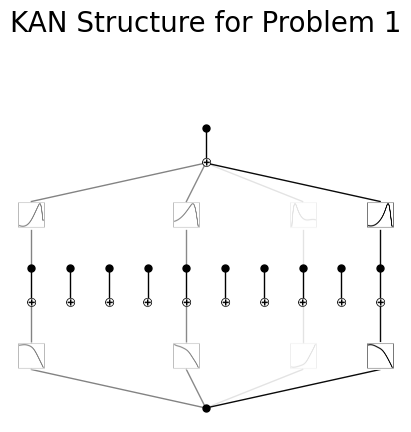

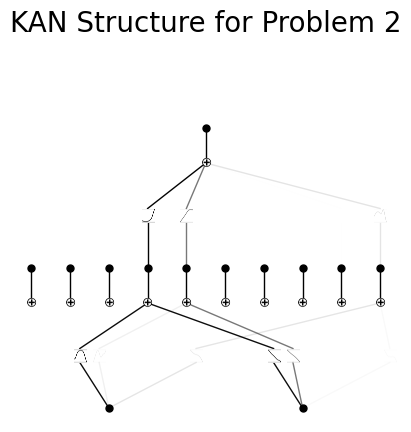

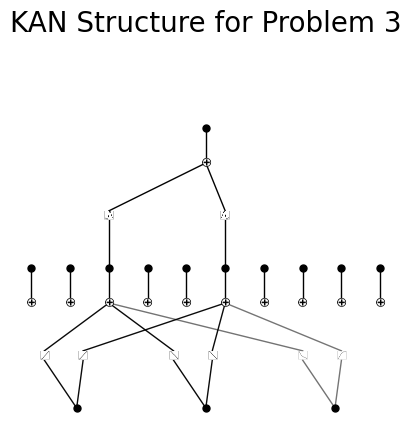

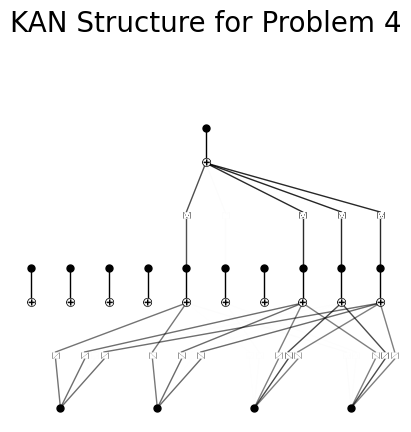

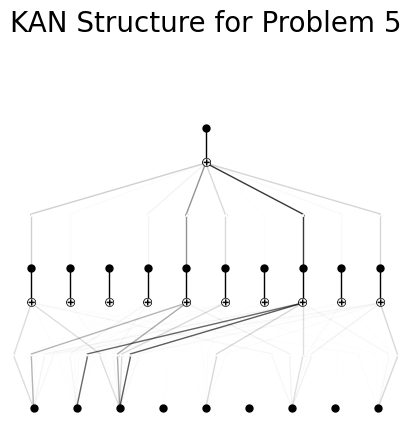

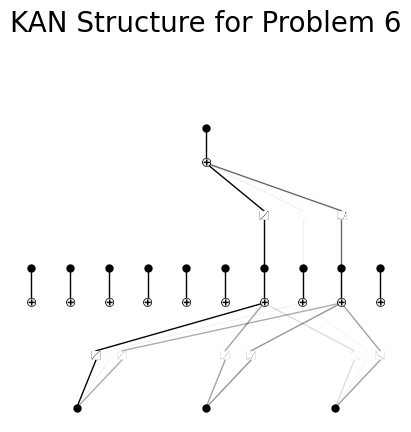

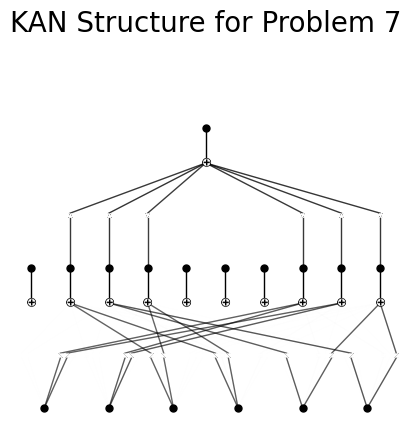

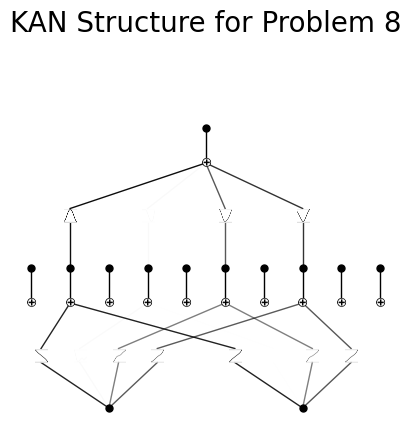

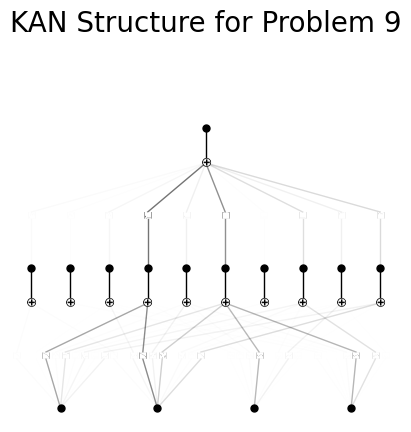

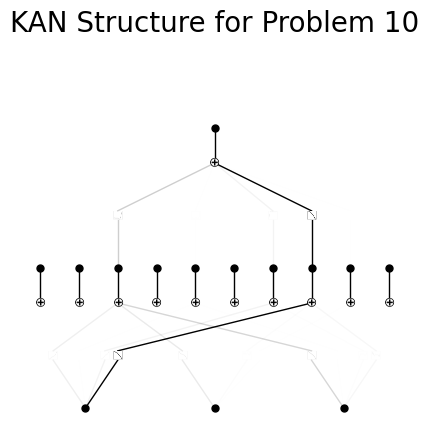

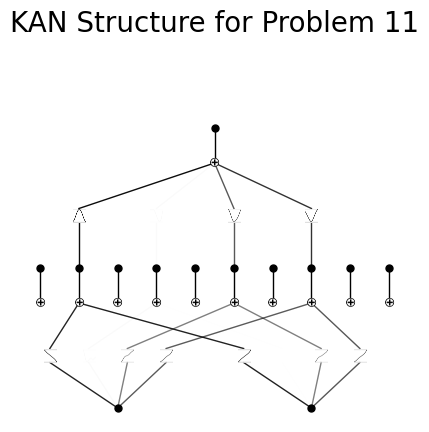

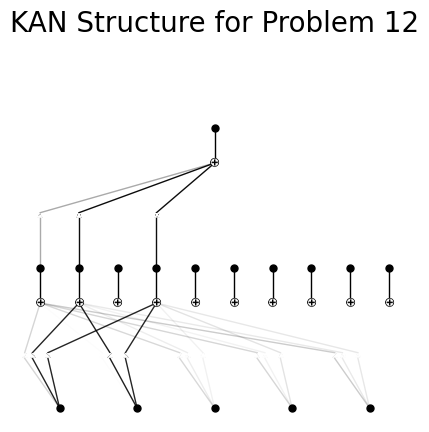

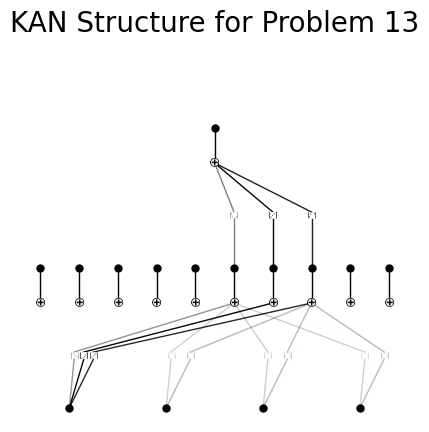

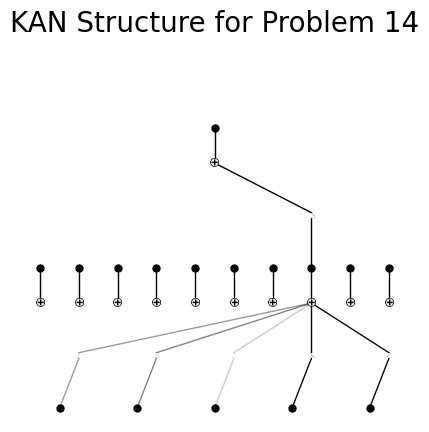

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)
loss_fn = torch.nn.MSELoss()

kan_train_logs, kan_test_logs = [], []
mlp_train_logs, mlp_test_logs = [], []

print("\n>>> Feynman 方程拟合对比（自动遍历所有可用问题）")

for problem_id in range(1, 15):
    try:
        input_vars, expr, f, ranges = get_feynman_dataset(problem_id)
    except:
        continue

    print(f"\n=== Problem {problem_id} ===")
    print(f"表达式: {expr}")

    # 数据集
    n_var = len(input_vars)
    dataset = create_dataset(f, n_var=n_var, ranges=ranges, device=device)

    # === KAN ===
    model = KAN(width=[n_var, 10, 1], grid=5, k=3, seed=42, device=device)
    kan_train, kan_test = [], []
    for _ in range(15):
        model.fit(dataset, opt="LBFGS", steps=1, lamb=1e-3)
        with torch.no_grad():
            pred_train = model(dataset['train_input'])
            pred_test = model(dataset['test_input'])
            kan_train.append(loss_fn(pred_train, dataset['train_label']).item())
            kan_test.append(loss_fn(pred_test, dataset['test_label']).item())
    model.plot(title=f"KAN Structure for Problem {problem_id}")
    kan_train_logs.append(kan_train)
    kan_test_logs.append(kan_test)

    # === MLP ===
    mlp = MLP(width=[n_var, 10, 1]).to(device)
    opt = torch.optim.LBFGS(mlp.parameters(), lr=1.0, max_iter=1)

    mlp_train, mlp_test = [], []
    for _ in range(15):
        def closure():
            opt.zero_grad()
            pred = mlp(dataset['train_input'])
            loss = loss_fn(pred, dataset['train_label'])
            loss.backward()
            return loss
        try:
            opt.step(closure)
            with torch.no_grad():
                pred_train = mlp(dataset['train_input'])
                pred_test = mlp(dataset['test_input'])
                mlp_train.append(loss_fn(pred_train, dataset['train_label']).item())
                mlp_test.append(loss_fn(pred_test, dataset['test_label']).item())
        except:
            mlp_train.append(float('inf'))
            mlp_test.append(float('inf'))

    mlp_train_logs.append(mlp_train)
    mlp_test_logs.append(mlp_test)

    print(f"KAN RMSE: {kan_test[-1]:.4f} | MLP RMSE: {mlp_test[-1]:.4f}")

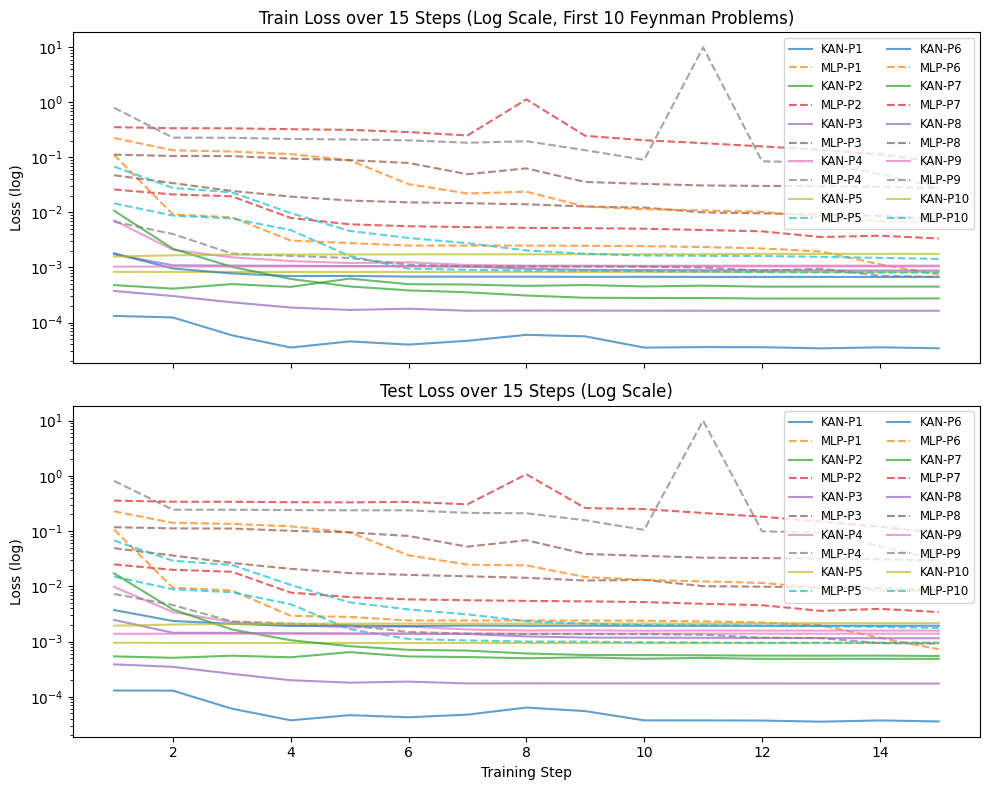

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# === 裁剪异常 loss（避免 MLP 某些爆炸情况）===
def clip_losses(logs, max_value=10.0):
    return [[min(loss, max_value) for loss in curve] for curve in logs]

kan_train_logs_clipped = clip_losses(kan_train_logs)
kan_test_logs_clipped = clip_losses(kan_test_logs)
mlp_train_logs_clipped = clip_losses(mlp_train_logs)
mlp_test_logs_clipped = clip_losses(mlp_test_logs)

# === 绘图：前10个 problem 的 loss 曲线 ===
steps = list(range(1, 16))
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

for i in range(min(10, len(kan_train_logs_clipped))):
    axs[0].plot(steps, kan_train_logs_clipped[i], label=f"KAN-P{i+1}", linestyle="-", alpha=0.7)
    axs[0].plot(steps, mlp_train_logs_clipped[i], label=f"MLP-P{i+1}", linestyle="--", alpha=0.7)
    axs[1].plot(steps, kan_test_logs_clipped[i], label=f"KAN-P{i+1}", linestyle="-", alpha=0.7)
    axs[1].plot(steps, mlp_test_logs_clipped[i], label=f"MLP-P{i+1}", linestyle="--", alpha=0.7)

# 设置对数坐标
axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].set_title("Train Loss over 15 Steps (Log Scale, First 10 Feynman Problems)")
axs[1].set_title("Test Loss over 15 Steps (Log Scale)")
axs[1].set_xlabel("Training Step")
axs[0].set_ylabel("Loss (log)")
axs[1].set_ylabel("Loss (log)")
axs[0].legend(ncol=2, fontsize="small", loc="upper right")
axs[1].legend(ncol=2, fontsize="small", loc="upper right")
plt.tight_layout()
plt.show()


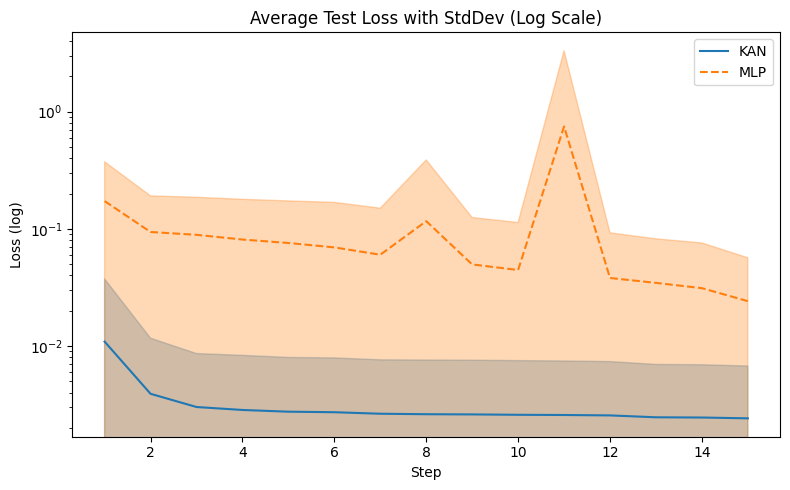

In [14]:
kan_mean = np.mean(kan_test_logs_clipped, axis=0)
kan_std = np.std(kan_test_logs_clipped, axis=0)
mlp_mean = np.mean(mlp_test_logs_clipped, axis=0)
mlp_std = np.std(mlp_test_logs_clipped, axis=0)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(steps, kan_mean, label='KAN', color='tab:blue')
ax.fill_between(steps, kan_mean-kan_std, kan_mean+kan_std, color='tab:blue', alpha=0.3)
ax.plot(steps, mlp_mean, label='MLP', color='tab:orange', linestyle='--')
ax.fill_between(steps, mlp_mean-mlp_std, mlp_mean+mlp_std, color='tab:orange', alpha=0.3)

ax.set_yscale('log')
ax.set_title("Average Test Loss with StdDev (Log Scale)")
ax.set_xlabel("Step")
ax.set_ylabel("Loss (log)")
ax.legend()
plt.tight_layout()
plt.show()
